In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
carSales = pd.read_csv('Car_sales.csv')

In [4]:
carSales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
carSales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer           157 non-null object
Model                  157 non-null object
Sales_in_thousands     157 non-null float64
__year_resale_value    121 non-null float64
Vehicle_type           157 non-null object
Price_in_thousands     155 non-null float64
Engine_size            156 non-null float64
Horsepower             156 non-null float64
Wheelbase              156 non-null float64
Width                  156 non-null float64
Length                 156 non-null float64
Curb_weight            155 non-null float64
Fuel_capacity          156 non-null float64
Fuel_efficiency        154 non-null float64
Latest_Launch          157 non-null object
Power_perf_factor      155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [6]:
carSales.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [7]:
#dealing with missing values
carSales.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [8]:
carSales.shape

(157, 16)

In [9]:
#Drop row if any column element is null
carSales.dropna(how='any').shape
#Drop row if only all the entries for the row is null
carSales.dropna(how='all').shape
#Drop only if subset of column is null
carSales.dropna(subset=['Horsepower','Length'],how = 'all').shape

(156, 16)

In [10]:
carSales.shape

(157, 16)

In [11]:
#Different ways of filling missing values
temp_sales = carSales.fillna({
         'Horespower' : 1,
         'Fuel_efficiency': 5
})

In [12]:
temp_sales.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         0
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [13]:
# Using ffill method - fills nan values with previous row value
# bfill - fills nan values with next row value
temp_sales1 = carSales.fillna(method='ffill')
temp_sales1.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [14]:
#interpolate method
temp_sales2 = carSales.interpolate()
temp_sales2.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [15]:
# different interpolate options
temp_sales2 = carSales.interpolate(method='cubic')
temp_sales2.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    7
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [16]:
carSales = temp_sales1


In [17]:
carSales.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [18]:
#Dropping duplicate rows in a table
carSales.drop_duplicates(keep='first')

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,28.400,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,39.000,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [19]:
carSales.shape

(157, 16)

In [20]:
carSales.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,19.775892,27.403229,3.063694,186.375796,107.522293,71.170701,187.473248,3.383032,17.945860,23.847134,77.289533
std,68.029422,14.071017,14.259785,1.041889,56.771067,7.629469,3.450553,13.486843,0.628442,3.876185,4.242891,25.081561
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.145000,2.300000,150.000000,103.000000,68.400000,177.600000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,14.010000,23.400000,3.000000,180.000000,107.000000,70.600000,188.000000,3.368000,17.200000,24.000000,72.290355
75%,67.956000,20.190000,31.930000,3.500000,215.000000,112.200000,73.500000,196.200000,3.821000,19.500000,26.000000,90.211700
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [21]:
#Sorting the data
carSales = carSales.sort_values(by = 'Manufacturer',ascending=True)

In [22]:
carSales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,28.40,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [23]:
# updating column names
#carSales.columns = carSales.columns.str.replace('_','.')

In [24]:
def min_max_values(col):
    top = carSales[col].idxmax()
    top_obs = pd.DataFrame(carSales.loc[top])
    
    bottom = carSales[col].idxmin()
    bottom_obs = pd.DataFrame(carSales.loc[bottom])
    
    min_max_obs = pd.concat([top_obs,bottom_obs],axis=1)
    
    return min_max_obs

In [25]:
min_max_values('Price_in_thousands')

,99,26
Manufacturer,Mercedes-B,Chevrolet
Model,CL500,Metro
Sales_in_thousands,0.954,21.855
__year_resale_value,58.6,5.16
Vehicle_type,Passenger,Passenger
Price_in_thousands,85.5,9.235
Engine_size,5,1
Horsepower,302,55
Wheelbase,113.6,93.1
Width,73.1,62.6


(array([30., 54., 35., 13., 14.,  3.,  2.,  2.,  2.,  2.]),
 array([ 9.235 , 16.8615, 24.488 , 32.1145, 39.741 , 47.3675, 54.994 ,
        62.6205, 70.247 , 77.8735, 85.5   ]),
 <a list of 10 Patch objects>)

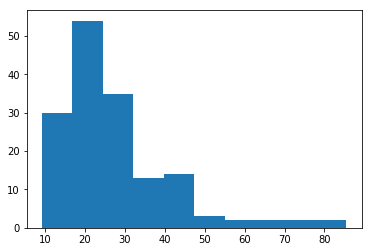

In [26]:
#Histogram of continuous numerical variable
num_bins = 10
plt.hist(carSales['Price_in_thousands'],num_bins) # y-axis have no of cars

C:\Users\saifgazali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


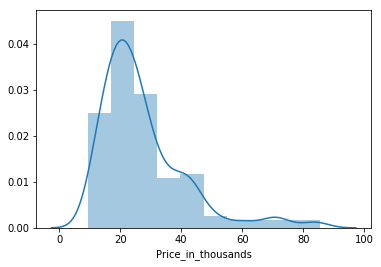

In [27]:
sns.distplot(carSales['Price_in_thousands'],bins=10) # percentage of cars

In [28]:
# Count by category
manFact = carSales.groupby('Manufacturer').size()
manFact

Manufacturer
Acura          4
Audi           3
BMW            3
Buick          4
Cadillac       5
Chevrolet      9
Chrysler       7
Dodge         11
Ford          11
Honda          5
Hyundai        3
Infiniti       1
Jaguar         1
Jeep           3
Lexus          6
Lincoln        3
Mercedes-B     9
Mercury        6
Mitsubishi     7
Nissan         7
Oldsmobile     6
Plymouth       4
Pontiac        6
Porsche        3
Saab           2
Saturn         5
Subaru         2
Toyota         9
Volkswagen     6
Volvo          6
dtype: int64

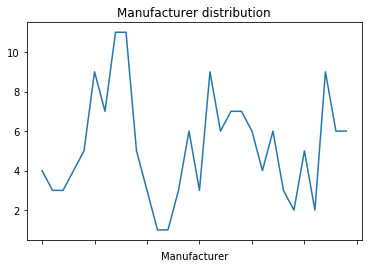

In [29]:
manFact.plot(title="Manufacturer distribution")

In [30]:
#Select all numerical variables
cars_num = carSales.select_dtypes(include=['float64','int64'])
cars_num.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,28.40,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,91.370778
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E25AE7A90>,
      dtype=object)

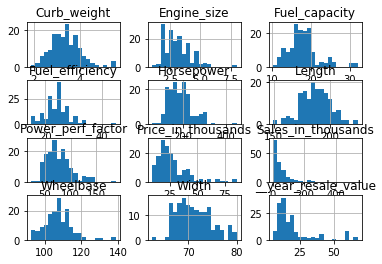

In [31]:
cars_num.hist(bins=20)

In [32]:
#Correlation with the variable of interest
cars_corr = cars_num.corr()['Sales_in_thousands'][:-1]
cars_corr


Sales_in_thousands     1.000000
__year_resale_value   -0.295524
Price_in_thousands    -0.304660
Engine_size            0.019991
Horsepower            -0.196822
Wheelbase              0.357616
Width                  0.140562
Length                 0.253191
Curb_weight            0.005272
Fuel_capacity          0.086512
Fuel_efficiency       -0.017000
Name: Sales_in_thousands, dtype: float64

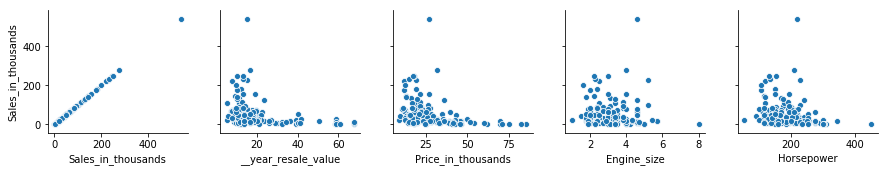

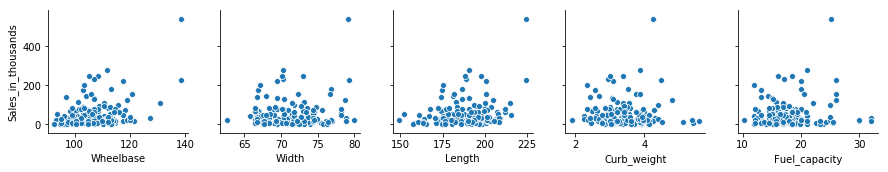

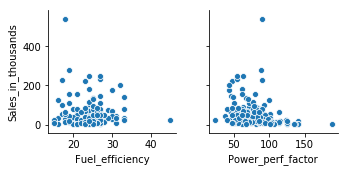

In [36]:
#Correlation using pairplot
for i in range(0,len(cars_num.columns),5):
    sns.pairplot(cars_num,y_vars=['Sales_in_thousands'],x_vars=cars_num.columns[i:i+5])

In [ ]:
#sns heatmap


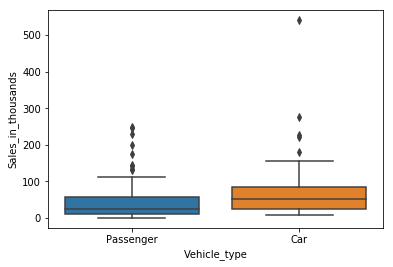

In [41]:
#BoxPlot
boxPlot1 = sns.boxplot(x='Vehicle_type',y='Sales_in_thousands',data=carSales)


C:\Users\saifgazali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


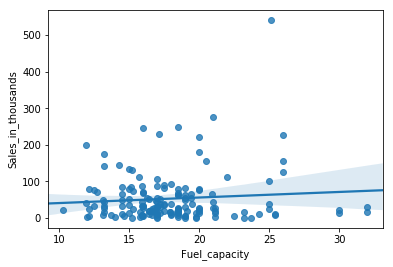

In [39]:
#sns regplot
sns.regplot(carSales['Fuel_capacity'],carSales['Sales_in_thousands'])